<a href="https://colab.research.google.com/github/wissal-mahri/data-science-colab-projects/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

# Charger les données MNIST (train et test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Afficher les formes (shape) des tenseurs
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("x_test shape:", x_test.shape)    # (10000, 28, 28)
print("y_test shape:", y_test.shape)    # (10000,)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


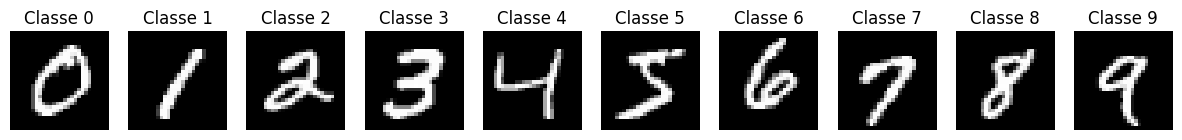

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Afficher un exemple d'image pour chaque classe
classes = list(range(10))
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i, c in enumerate(classes):
    # Trouver le premier index avec le label c
    index = np.where(y_train == c)[0][0]
    axes[i].imshow(x_train[index], cmap='gray')
    axes[i].set_title(f"Classe {c}")
    axes[i].axis('off')

plt.show()


In [ ]:
#normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32')  / 255.0


In [ ]:
#Reshape pour ajouter un canal (nécessaire pour CNN)
# Ajouter une dimension de canal : (28, 28) → (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
#Encodage des labels (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def small_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),                         # ✅ Batch Norm après la 1ère conv
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),                         # ✅ Batch Norm après la 2e conv
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),

        Dense(128, activation='relu'),
        BatchNormalization(),                         # ✅ Batch Norm après dense 128
        Dropout(0.5),

        Dense(64, activation='relu'),
        BatchNormalization(),                         # ✅ Batch Norm après dense 64
        Dropout(0.5),

        Dense(num_classes, activation='softmax')      # Pas besoin de batch norm ici
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = small_cnn()
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,802 (913.29 KB)

 Trainable params: 233,226 (911.04 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
# 6. Entraînement (optionnel)
# Entraîner le modèle et sauvegarder l’historique
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=100,
    validation_split=0.1,  # 20% des données pour validation
    verbose=1
)

# 7. Évaluation (optionnel)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6849 - loss: 1.0215 - val_accuracy: 0.3453 - val_loss: 2.0125
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9450 - loss: 0.1994 - val_accuracy: 0.9793 - val_loss: 0.0701
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9598 - loss: 0.1356 - val_accuracy: 0.9840 - val_loss: 0.0547
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9665 - loss: 0.1170 - val_accuracy: 0.9847 - val_loss: 0.0521
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9708 - loss: 0.0997 - val_accuracy: 0.9820 - val_loss: 0.0623
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9748 - loss: 0.0868 - val_accuracy: 0.9853 - val_loss: 0.0485
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9752 - loss: 0.0898 - val_accuracy: 0.9898 - val_loss: 0.0339
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9785 - loss: 0.0744 - val_accuracy: 0

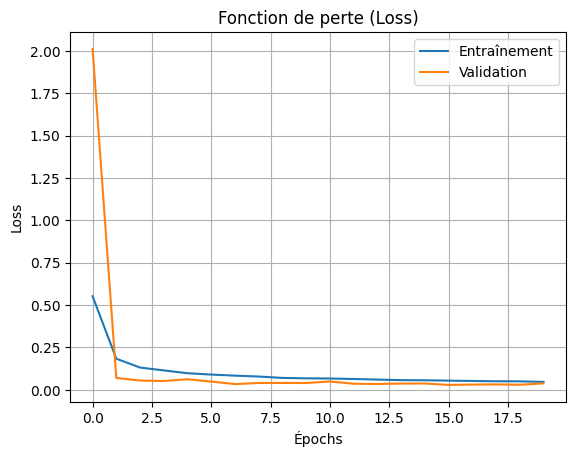

In [ ]:
import matplotlib.pyplot as plt

# Courbe de la perte
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Fonction de perte (Loss)')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('Accuracy')
plt.show()
